In [1]:
#Iris Dataset - UCI Machine Learning Repo: 10.24432/C56C76
#https://archive.ics.uci.edu/dataset/53/iris
#Almost directly using the example here: https://gist.github.com/NiharG15/cd8272c9639941cf8f481a7c4478d525

"""
    A simple neural network written in Keras (TensorFlow backend) to classify the IRIS data
"""

import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt

In [2]:
iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]


In [5]:
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y_)
#print(y)

In [6]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [8]:
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Adam optimizer with learning rate of 0.001
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
#Train the model
history = model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
24/24 - 2s - 86ms/step - accuracy: 0.3250 - loss: 1.5703
Epoch 2/200
24/24 - 0s - 3ms/step - accuracy: 0.3250 - loss: 1.3615
Epoch 3/200
24/24 - 0s - 4ms/step - accuracy: 0.3250 - loss: 1.2221
Epoch 4/200
24/24 - 0s - 3ms/step - accuracy: 0.3583 - loss: 1.1322
Epoch 5/200
24/24 - 0s - 7ms/step - accuracy: 0.4083 - loss: 1.0428
Epoch 6/200
24/24 - 0s - 4ms/step - accuracy: 0.3583 - loss: 0.9948
Epoch 7/200
24/24 - 0s - 6ms/step - accuracy: 0.3583 - loss: 0.9542
Epoch 8/200
24/24 - 0s - 4ms/step - accuracy: 0.3583 - loss: 0.9173
Epoch 9/200
24/24 - 0s - 6ms/step - accuracy: 0.4333 - loss: 0.8842
Epoch 10/200
24/24 - 0s - 5ms/step - accuracy: 0.5917 - loss: 0.8514
Epoch 11/200
24/24 - 0s - 5ms/step - accuracy: 0.6833 - loss: 0.8155
Epoch 12/200
24/24 - 0s - 4ms/step - accuracy: 0.7667 - loss: 0.7814
Epoch 13/200
24/24 - 0s - 5ms/step - accuracy: 0.7500 - loss: 0.7393
Epoch 14/200
24/24 - 0s - 5ms/step - accuracy: 0.7667 - loss: 0.6817
Epoch 15/200
24/24 - 0s - 6ms/step - accur

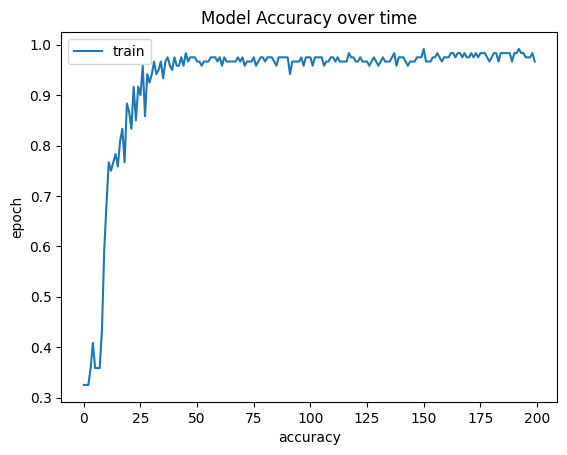

In [14]:
#Plot model history - accuracy
#Help from stack overflow: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy over time")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train'])

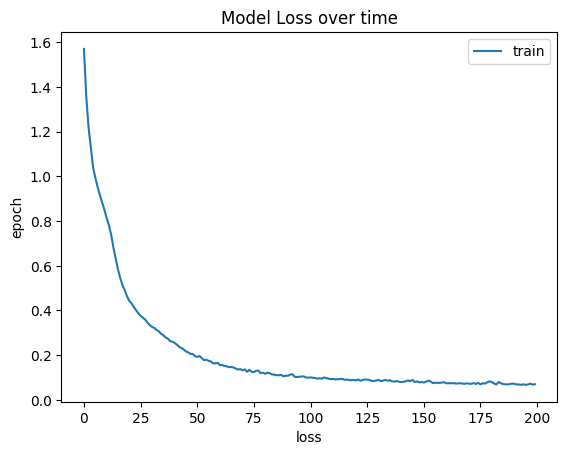

In [15]:
#Plot model history - loss
#Help from stack overflow: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
plt.plot(history.history['loss'])
plt.title("Model Loss over time")
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train'])

In [16]:
# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - accuracy: 1.0000 - loss: 0.0261
Final test set loss: 0.026068
Final test set accuracy: 1.000000


In [20]:
#Visualize a test set image and prediction
#random_num = 0
random_num = 18
predict_y = model.predict(test_x)
#Visualize an image from the training set
print(f"Prediction: {np.argmax(predict_y[random_num])}")
print(f"Actual: {np.argmax(test_y[random_num])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: 2
Actual: 2
